In [1]:
!pip install tensorflow pandas numpy scikit-learn


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\1508\\appdata\\local\\anaconda30\\lib\\site-packages\\numpy-1.23.5.dist-info\\METADATA'


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd


In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# Initialize the model
model = Sequential()

# Add the input layer and first hidden layer
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))

# Add the second hidden layer
model.add(Dense(units=8, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification


c:\Users\1508\AppData\Local\anaconda31\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.2540 - loss: 0.8490 - val_accuracy: 0.1978 - val_loss: 0.8027
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2980 - loss: 0.7768 - val_accuracy: 0.2967 - val_loss: 0.7384
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3889 - loss: 0.7118 - val_accuracy: 0.4396 - val_loss: 0.6770
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5383 - loss: 0.6544 - val_accuracy: 0.5934 - val_loss: 0.6195
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7390 - loss: 0.5864 - val_accuracy: 0.8022 - val_loss: 0.5686
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8677 - loss: 0.5366 - val_accuracy: 0.9121 - val_loss: 0.5208
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9146 - loss: 0.4973 - val_accuracy: 0.9341 - val_loss: 0.4669
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9417 - loss: 0.4286 - val_accuracy: 0.9560 - 

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9649


In [8]:
# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [9]:
predictions

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb



In [11]:
# Load the IMDB dataset
max_features = 5000  # number of words to consider as features
maxlen = 400  # cut texts after this number of words

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)



In [12]:
# Padding sequences to ensure equal length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)



In [13]:
# Model architecture
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))  # Embedding layer



c:\Users\1508\AppData\Local\anaconda31\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
# First Conv1D layer with multiple filters and different filter sizes
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))

# Global max pooling to reduce the dimensionality
model.add(GlobalMaxPooling1D())

# Fully connected output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - accuracy: 0.7047 - loss: 0.5346 - val_accuracy: 0.8712 - val_loss: 0.3034
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9084 - loss: 0.2289 - val_accuracy: 0.8818 - val_loss: 0.2836
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.9461 - loss: 0.1437 - val_accuracy: 0.8856 - val_loss: 0.2944
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.9724 - loss: 0.0843 - val_accuracy: 0.8707 - val_loss: 0.3832
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.9854 - loss: 0.0476 - val_accuracy: 0.8770 - val_loss: 0.4328


In [17]:
# Evaluate the model
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print(f'Test accuracy: {acc:.3f}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8781 - loss: 0.4334
Test accuracy: 0.877


Sentiment Analysis using RNN

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [19]:
# Load the IMDB dataset
max_features = 10000  # Number of words to consider as features
max_len = 500  # Cut texts after this number of words (among top max_features most common words)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)



In [20]:
# Pad sequences to ensure uniform input size
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)



In [21]:
# Build the RNN model
model = Sequential()
model.add(Embedding(max_features, 32, input_length=max_len))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 77ms/step - accuracy: 0.6022 - loss: 0.6415 - val_accuracy: 0.7098 - val_loss: 0.5699
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.7896 - loss: 0.4671 - val_accuracy: 0.8110 - val_loss: 0.4153
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 125ms/step - accuracy: 0.8697 - loss: 0.3156 - val_accuracy: 0.8432 - val_loss: 0.3874
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - accuracy: 0.7848 - loss: 0.4314 - val_accuracy: 0.8390 - val_loss: 0.4009
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step - accuracy: 0.8982 - loss: 0.2543 - val_accuracy: 0.7710 - val_loss: 0.4854
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.9011 - loss: 0.2499 - val_accuracy: 0.8622 - val_loss: 0.3749
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 115ms/step - accuracy: 0.9372 - loss: 0.1632 - val_accuracy: 0.8556 - val_loss: 0.3736
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step - accuracy: 0.9324 - loss: 0.16

In [24]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8408 - loss: 0.4486
Test Accuracy: 0.8423


Regularization and early stopping

In [25]:
from tensorflow.keras.layers import Dropout, LSTM

model = Sequential()
model.add(Embedding(max_features, 32, input_length=max_len))
model.add(LSTM(32, activation='tanh', recurrent_dropout=0.2))  # Added recurrent_dropout
model.add(Dropout(0.5))  # Added dropout layer
model.add(Dense(1, activation='sigmoid'))

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 240ms/step - accuracy: 0.6456 - loss: 0.6226 - val_accuracy: 0.8084 - val_loss: 0.4304
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 227ms/step - accuracy: 0.8406 - loss: 0.3885 - val_accuracy: 0.8360 - val_loss: 0.4018
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 179ms/step - accuracy: 0.8643 - loss: 0.3435 - val_accuracy: 0.8314 - val_loss: 0.3980
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.8421 - loss: 0.3640 - val_accuracy: 0.8452 - val_loss: 0.3760
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 176ms/step - accuracy: 0.9039 - loss: 0.2602 - val_accuracy: 0.8316 - val_loss: 0.4051
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 217ms/step - accuracy: 0.9129 - loss: 0.2382 - val_accuracy: 0.8336 - val_loss: 0.4282
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 218ms/step - accuracy: 0.9207 - loss: 0.2130 - val_accuracy: 0.8144 - val_loss: 0.4643


In [27]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.8447 - loss: 0.3783
Test Accuracy: 0.8474


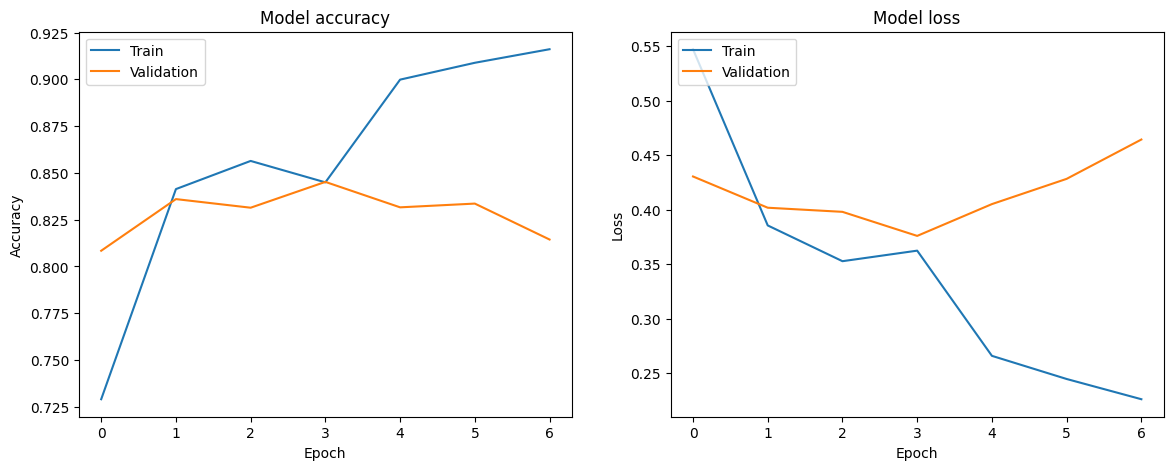

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
